In [1]:
from keras.datasets import reuters
import numpy as np

/Users/tristanbehrens/Development/python-venvs/venv-3.6/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [3]:
print(train_data.shape)
print(test_data.shape)
print(train_data[0])
print(train_data[1])

print(np.max(np.max(train_data)))

(8982,)
(2246,)
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
[1, 3267, 699, 3434, 2295, 56, 2, 7511, 9, 56, 3906, 1073, 81, 5, 1198, 57, 366, 737, 132, 20, 4093, 7, 2, 49, 2295, 2, 1037, 3267, 699, 3434, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2295, 2, 2, 775, 7, 48, 34, 191, 44, 35, 1795, 505, 17, 12]
9975


In [4]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [5]:
def print_decoded_newswire(index):
    decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[index]])
    print(decoded_newswire)

In [6]:
for i in range(2):
    print_decoded_newswire(i)

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3
? generale de banque sa lt ? br and lt heller overseas corp of chicago have each taken 50 pct stakes in ? company sa ? factors generale de banque said in a statement it gave no financial details of the transaction sa ? ? turnover in 1986 was 17 5 billion belgian francs reuter 3


In [8]:
print(train_labels[0:10])
print(np.min(train_labels))
print(np.max(train_labels))

[ 3  4  3  4  4  4  4  3  3 16]
0
45


In [9]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [10]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [11]:
print(x_train.shape)
print(x_test.shape)
print(x_train[0])
print(np.mean(x_train[0]))

(8982, 10000)
(2246, 10000)
[0. 1. 1. ... 0. 0. 0.]
0.0057


In [12]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1
    return results

In [13]:
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [14]:
print(one_hot_train_labels.shape)
print(one_hot_test_labels.shape)
print(one_hot_train_labels[0])
print(np.argmax(one_hot_train_labels[0]))

(8982, 46)
(2246, 46)
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3


In [15]:
from keras.utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [16]:
print(one_hot_train_labels.shape)
print(one_hot_test_labels.shape)
print(one_hot_train_labels[0])
print(np.argmax(one_hot_train_labels[0]))

(8982, 46)
(2246, 46)
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3


In [18]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation="relu", input_shape=(10000,)))
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(46, activation="softmax"))

In [19]:
model.compile(
    optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [20]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [21]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=9,
    batch_size=512,
    validation_data=(x_val, y_val)
)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s 223us/step - loss: 2.4997 - acc: 0.4899 - val_loss: 1.6813 - val_acc: 0.6480
Epoch 2/9
7982/7982 [==============================] - 1s 145us/step - loss: 1.3915 - acc: 0.7038 - val_loss: 1.2790 - val_acc: 0.7190
Epoch 3/9
7982/7982 [==============================] - 1s 139us/step - loss: 1.0487 - acc: 0.7699 - val_loss: 1.1181 - val_acc: 0.7610
Epoch 4/9
7982/7982 [==============================] - 1s 148us/step - loss: 0.8246 - acc: 0.8282 - val_loss: 1.0217 - val_acc: 0.7760
Epoch 5/9
7982/7982 [==============================] - 1s 168us/step - loss: 0.6599 - acc: 0.8637 - val_loss: 0.9688 - val_acc: 0.7970
Epoch 6/9
7982/7982 [==============================] - 1s 146us/step - loss: 0.5254 - acc: 0.8931 - val_loss: 0.9200 - val_acc: 0.8090
Epoch 7/9
7982/7982 [==============================] - 1s 135us/step - loss: 0.4291 - acc: 0.9118 - val_loss: 0.9108 - val_acc: 0.8030
Epoch 8

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

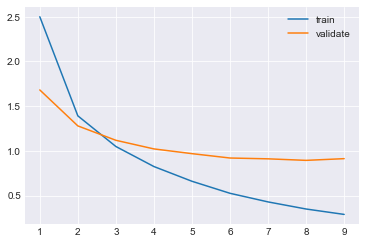

In [27]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, label="train")
plt.plot(epochs, val_loss, label="validate")
plt.legend()
plt.show()

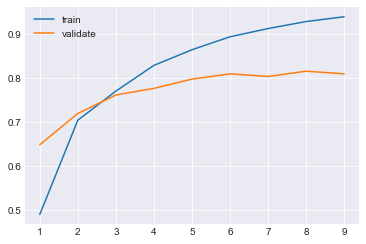

In [31]:
acc = history.history["acc"]
val_acc = history.history["val_acc"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, acc, label="train")
plt.plot(epochs, val_acc, label="validate")
plt.legend()
plt.show()

In [32]:
result = model.evaluate(x_test, one_hot_test_labels)
print(result)

2246/2246 [==============================] - 0s 149us/step
[1.002043606443057, 0.7787177204183457]


In [ ]:
def plot_hist(history_dict):
   fig = plt.figure(figsize=(5,4))
   f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5),sharey=True)
   
   ax1.plot(epochs,  history_dict['loss'],label="Train")
   ax1.plot(epochs,  history_dict['val_loss'],label="CV")
   ax1.set_title("Loss function development - Training set vs CV set")
   ax1.legend(loc='upper right')
   ax1.set_xlabel('Epochs')
   ax1.set_ylabel('Values')
   
   ax2.plot(epochs,  history_dict['acc'],label="Train")
   ax2.plot(epochs,  history_dict['val_acc'],label="CV")
   ax2.set_title("Accuracy development - Training set vs CV set")
   ax2.legend(loc='upper right')
   ax2.set_xlabel('Epochs')
   
   plt.suptitle('TITLE', fontsize=16)

In [ ]:
plot_hist(history.history)